In [1]:
import pandas as pd
import sklearn as sk
import sqlalchemy as sqla

In [2]:
data = pd.read_csv('US_Stock_Data.csv')

In [3]:
print(data.head())

   Unnamed: 0        Date  Natural_Gas_Price  Natural_Gas_Vol.  \
0           0    2/2/2024              2.079               NaN   
1           1    1/2/2024              2.050          161340.0   
2           2  31-01-2024              2.100          142860.0   
3           3  30-01-2024              2.077          139750.0   
4           4  29-01-2024              2.490            3590.0   

   Crude_oil_Price  Crude_oil_Vol.  Copper_Price  Copper_Vol. Bitcoin_Price  \
0            72.28             NaN        3.8215          NaN     43,194.70   
1            73.82        577940.0        3.8535          NaN     43,081.40   
2            75.85        344490.0        3.9060          NaN     42,580.50   
3            77.82        347240.0        3.9110          NaN     42,946.20   
4            76.78        331930.0        3.8790          NaN     43,299.80   

   Bitcoin_Vol.  ... Berkshire_Price  Berkshire_Vol. Netflix_Price  \
0         42650  ...        5,89,498           10580      

In [4]:
data['Date'] = pd.to_datetime(data['Date'], errors='coerce')

data = data.dropna()

print(data.info())



<class 'pandas.core.frame.DataFrame'>
Index: 245 entries, 35 to 867
Data columns (total 39 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Unnamed: 0         245 non-null    int64         
 1   Date               245 non-null    datetime64[ns]
 2   Natural_Gas_Price  245 non-null    float64       
 3   Natural_Gas_Vol.   245 non-null    float64       
 4   Crude_oil_Price    245 non-null    float64       
 5   Crude_oil_Vol.     245 non-null    float64       
 6   Copper_Price       245 non-null    float64       
 7   Copper_Vol.        245 non-null    float64       
 8   Bitcoin_Price      245 non-null    object        
 9   Bitcoin_Vol.       245 non-null    int64         
 10  Platinum_Price     245 non-null    object        
 11  Platinum_Vol.      245 non-null    float64       
 12  Ethereum_Price     245 non-null    object        
 13  Ethereum_Vol.      245 non-null    int64         
 14  S&P_500_Price 

In [5]:
# Função auxiliar para remover vírgulas e converter para float, lidando com strings e NaN
def clean_numeric_column(column):
    if column.dtype == 'object':  # Verifica se a coluna é string
        column = column.str.replace(',', '').astype(float)
    return column

# Aplicar a função de limpeza às colunas numéricas
data['Amazon_Price'] = clean_numeric_column(data['Amazon_Price'])
data['Natural_Gas_Price'] = clean_numeric_column(data['Natural_Gas_Price'])
data['Crude_oil_Price'] = clean_numeric_column(data['Crude_oil_Price'])
data['Copper_Price'] = clean_numeric_column(data['Copper_Price'])
data['Bitcoin_Price'] = clean_numeric_column(data['Bitcoin_Price'])
data['Platinum_Price'] = clean_numeric_column(data['Platinum_Price'])
data['Ethereum_Price'] = clean_numeric_column(data['Ethereum_Price'])
data['Nasdaq_100_Price'] = clean_numeric_column(data['Nasdaq_100_Price'])
data['Apple_Price'] = clean_numeric_column(data['Apple_Price'])

# Verificar se as colunas foram convertidas corretamente
print(data[['Amazon_Price', 'Natural_Gas_Price', 'Crude_oil_Price', 'Copper_Price', 
           'Bitcoin_Price', 'Platinum_Price', 'Ethereum_Price', 'Nasdaq_100_Price', 
           'Apple_Price']].head())


    Amazon_Price  Natural_Gas_Price  Crude_oil_Price  Copper_Price  \
35        147.48              2.311            68.61        3.7875   
36        145.89              2.350            71.32        3.7805   
37        147.42              2.504            71.23        3.8305   
38        146.88              2.520            69.34        3.7975   
39        144.52              2.517            69.38        3.7345   

    Bitcoin_Price  Platinum_Price  Ethereum_Price  Nasdaq_100_Price  \
35        41487.0           931.0         2203.49          16354.25   
36        41256.1           915.7         2225.34          16221.74   
37        44175.5           919.8         2358.42          16084.69   
38        43289.7           912.0         2355.80          16022.49   
39        43776.3           893.7         2233.45          15788.05   

    Apple_Price  
35       194.71  
36       193.18  
37       195.71  
38       194.27  
39       192.32  


In [10]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

# Correcting the column names based on the actual dataframe
x = data[['Natural_Gas_Price', 'Crude_oil_Price', 'Copper_Price', 'Bitcoin_Price', 'Platinum_Price', 'Ethereum_Price', 'Nasdaq_100_Price', 'Apple_Price']]
y = data['Amazon_Price']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(x_train, y_train)


y_pred = model.predict(x_test)






In [11]:
from sqlalchemy import create_engine

engine = create_engine('sqlite:///stock_data.db', echo=True)

data.to_sql('stock_prices', engine, index = False, if_exists = 'replace')

df_from_db = pd.read_sql('stock_prices', engine)
print(df_from_db.head())

2024-10-04 15:30:26,889 INFO sqlalchemy.engine.Engine BEGIN (implicit)
2024-10-04 15:30:26,900 INFO sqlalchemy.engine.Engine PRAGMA main.table_info("stock_prices")
2024-10-04 15:30:26,902 INFO sqlalchemy.engine.Engine [raw sql] ()
2024-10-04 15:30:26,905 INFO sqlalchemy.engine.Engine PRAGMA main.table_info("stock_prices")
2024-10-04 15:30:26,906 INFO sqlalchemy.engine.Engine [raw sql] ()
2024-10-04 15:30:26,910 INFO sqlalchemy.engine.Engine SELECT name FROM sqlite_master WHERE type='table' AND name NOT LIKE 'sqlite~_%' ESCAPE '~' ORDER BY name
2024-10-04 15:30:26,911 INFO sqlalchemy.engine.Engine [raw sql] ()
2024-10-04 15:30:26,913 INFO sqlalchemy.engine.Engine SELECT name FROM sqlite_master WHERE type='view' AND name NOT LIKE 'sqlite~_%' ESCAPE '~' ORDER BY name
2024-10-04 15:30:26,914 INFO sqlalchemy.engine.Engine [raw sql] ()
2024-10-04 15:30:26,916 INFO sqlalchemy.engine.Engine PRAGMA main.table_xinfo("stock_prices")
2024-10-04 15:30:26,918 INFO sqlalchemy.engine.Engine [raw sql] 

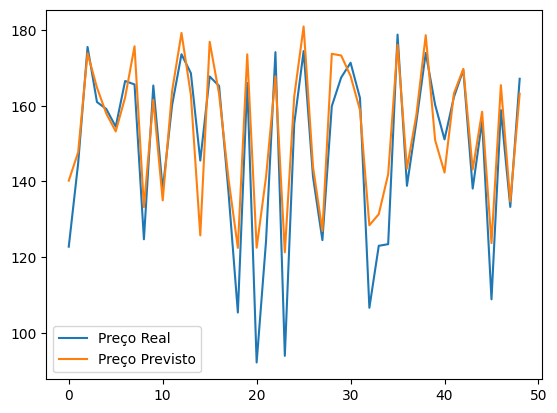

In [12]:
import matplotlib.pyplot as plt

# Visualizar os preços reais vs previsões
plt.plot(y_test.values, label='Preço Real')
plt.plot(y_pred, label='Preço Previsto')
plt.legend()
plt.show()
